<a href="https://colab.research.google.com/github/Umama123/Housing-price-predictor-/blob/main/ML_A_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📦 Import libraries
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# 🔗 Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# 📥 Load Data
file_path = '/content/drive/MyDrive/ML_A_03/global_housing_market_extended.csv'
df = pd.read_csv(file_path)

# Drop non-numeric or unnecessary columns
df = df.drop(columns=['Country', 'Year'])

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features and target
X = df.drop(columns=['House Price Index']).values
y = df['House Price Index'].values.reshape(-1, 1)

# Normalize features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [ ]:
def gradient_descent(X, y, lr=0.01, epochs=1000, batch_size=None,
                     reg_type=None, lam=0.01, early_stopping=True, patience=10):
    m, n = X.shape
    W = np.random.randn(n, 1)
    b = 0
    best_loss = float('inf')
    patience_counter = 0

    losses = []

    for epoch in range(epochs):
        # Shuffle
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size if batch_size else m):
            X_batch = X_shuffled[i:i + (batch_size if batch_size else m)]
            y_batch = y_shuffled[i:i + (batch_size if batch_size else m)]

            y_pred = X_batch @ W + b
            error = y_pred - y_batch
            loss = np.mean(error**2)

            # Add regularization
            if reg_type == 'l2':
                loss += lam * np.sum(W ** 2)
            elif reg_type == 'l1':
                loss += lam * np.sum(np.abs(W))

            losses.append(loss)

            # Gradients
            dW = 2 * X_batch.T @ error / len(X_batch)
            db = 2 * np.mean(error)

            # Regularization grads
            if reg_type == 'l2':
                dW += 2 * lam * W
            elif reg_type == 'l1':
                dW += lam * np.sign(W)

            # Update
            W -= lr * dW
            b -= lr * db

        # Early stopping check
        val_pred = X_test @ W + b
        val_loss = mean_squared_error(y_test, val_pred)

        if val_loss < best_loss:
            best_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if early_stopping and patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break

    return W, b


In [ ]:
models = {}

# Batch GD
models['Batch GD'] = gradient_descent(X_train, y_train, lr=0.01, epochs=500, reg_type='l2', batch_size=None)

# Stochastic GD
models['Stochastic GD'] = gradient_descent(X_train, y_train, lr=0.01, epochs=500, reg_type='l1', batch_size=1)

# Mini-batch GD
models['Mini-batch GD'] = gradient_descent(X_train, y_train, lr=0.01, epochs=500, reg_type='l2', batch_size=32)


Early stopping at epoch 264
Early stopping at epoch 14
Early stopping at epoch 71


Batch GD - RMSE: 30.46, R²: -0.01


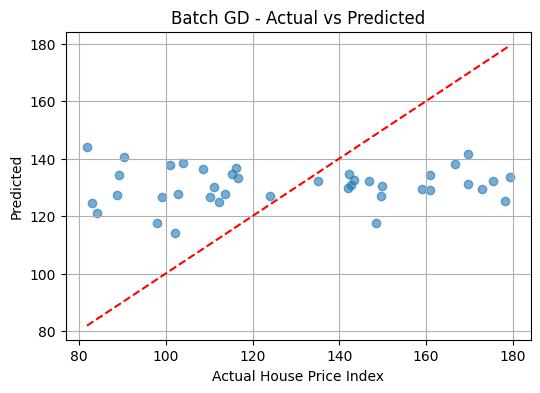

Stochastic GD - RMSE: 30.54, R²: -0.01


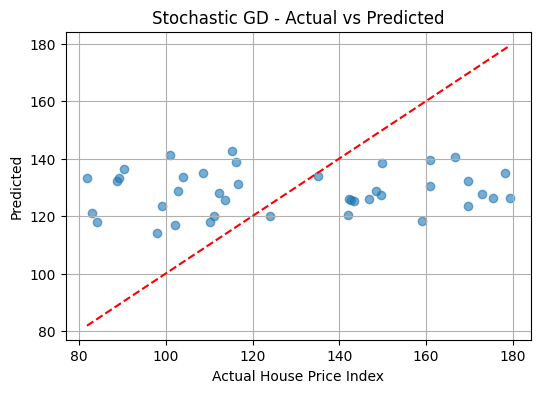

Mini-batch GD - RMSE: 30.49, R²: -0.01


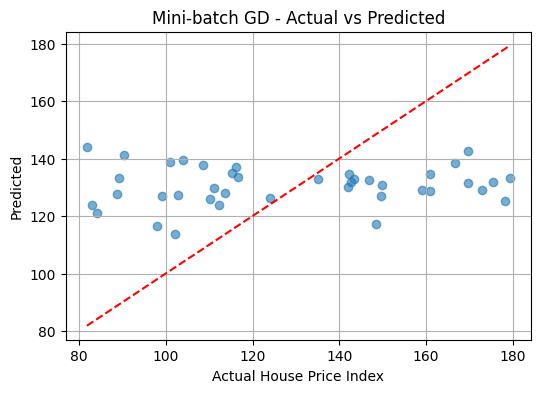

In [ ]:
def evaluate_and_plot(model_name, W, b):
    y_pred = X_test @ W + b
    y_pred_inv = scaler_y.inverse_transform(y_pred)
    y_test_inv = scaler_y.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)

    print(f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test_inv, y_pred_inv, alpha=0.6)
    plt.plot([y_test_inv.min(), y_test_inv.max()],
             [y_test_inv.min(), y_test_inv.max()], 'r--')
    plt.xlabel("Actual House Price Index")
    plt.ylabel("Predicted")
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.grid(True)
    plt.show()

for name, (W, b) in models.items():
    evaluate_and_plot(name, W, b)


**Regression Techniques:**

In [ ]:
def train_and_evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.ravel())

    y_pred = model.predict(X_test)
    y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
    y_test_inv = scaler_y.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)

    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test_inv, y_pred_inv, alpha=0.6)
    plt.plot([y_test_inv.min(), y_test_inv.max()],
             [y_test_inv.min(), y_test_inv.max()], 'r--')
    plt.xlabel("Actual House Price Index")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Actual vs Predicted")
    plt.grid(True)
    plt.show()


Linear Regression - RMSE: 30.51, R²: -0.01


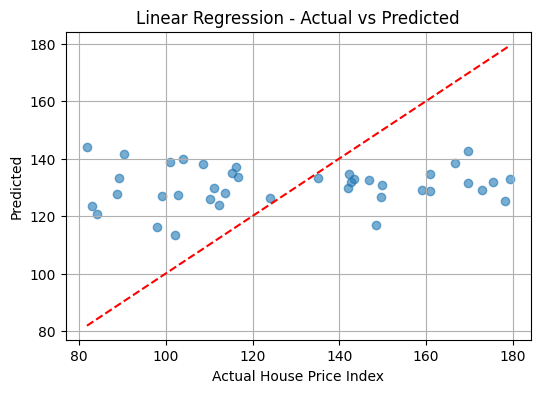

Ridge Regression (L2) - RMSE: 30.50, R²: -0.01


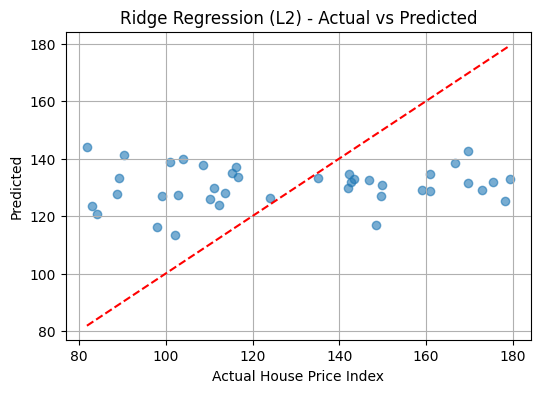

Lasso Regression (L1) - RMSE: 30.42, R²: -0.00


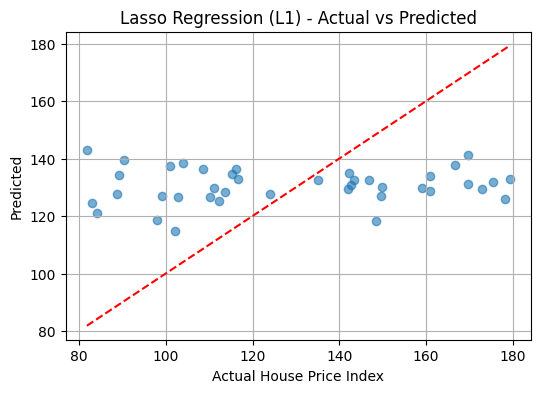

In [ ]:
# Linear Regression
train_and_evaluate_model("Linear Regression", LinearRegression(), X_train, y_train, X_test, y_test)

# Ridge Regression (L2)
train_and_evaluate_model("Ridge Regression (L2)", Ridge(alpha=1.0), X_train, y_train, X_test, y_test)

# Lasso Regression (L1)
train_and_evaluate_model("Lasso Regression (L1)", Lasso(alpha=0.01, max_iter=10000), X_train, y_train, X_test, y_test)


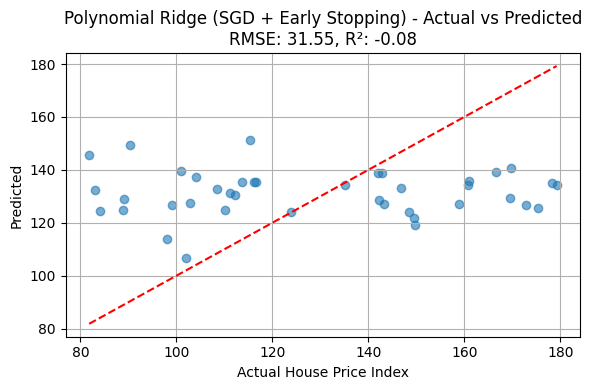

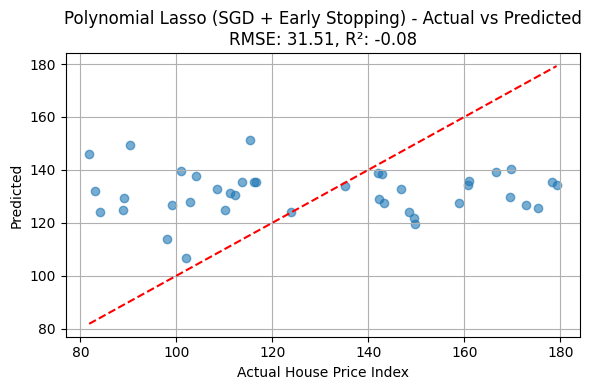

In [ ]:
from sklearn.linear_model import SGDRegressor

# Transform to polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Scale
X_poly_scaled = scaler_X.fit_transform(X_poly)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_scaled, y_scaled, test_size=0.2, random_state=42)

# L2 Regularization with Early Stopping (Ridge)
sgd_ridge = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.001,
                         learning_rate='adaptive', early_stopping=True,
                         validation_fraction=0.1, n_iter_no_change=5,
                         max_iter=1000, random_state=42)

# L1 Regularization with Early Stopping (Lasso)
sgd_lasso = SGDRegressor(loss='squared_error', penalty='l1', alpha=0.001,
                         learning_rate='adaptive', early_stopping=True,
                         validation_fraction=0.1, n_iter_no_change=5,
                         max_iter=1000, random_state=42)

# Training & Plotting Function
def train_sgd_with_plot(model, name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
    y_test_inv = scaler_y.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)

    # Plot
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test_inv, y_pred_inv, alpha=0.6)
    plt.plot([y_test_inv.min(), y_test_inv.max()],
             [y_test_inv.min(), y_test_inv.max()], 'r--')
    plt.xlabel("Actual House Price Index")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Actual vs Predicted\nRMSE: {rmse:.2f}, R²: {r2:.2f}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run models with early stopping
train_sgd_with_plot(sgd_ridge, "Polynomial Ridge (SGD + Early Stopping)", X_train_poly, y_train_poly, X_test_poly, y_test_poly)
train_sgd_with_plot(sgd_lasso, "Polynomial Lasso (SGD + Early Stopping)", X_train_poly, y_train_poly, X_test_poly, y_test_poly)


In [ ]:
import pickle


with open("ridge_model.pkl", "wb") as f:
    pickle.dump(sgd_ridge, f)


with open("scaler_X.pkl", "wb") as f:
    pickle.dump(scaler_X, f)

with open("scaler_y.pkl", "wb") as f:
    pickle.dump(scaler_y, f)

with open("poly_transformer.pkl", "wb") as f:
    pickle.dump(poly, f)


In [ ]:
!pip install huggingface_hub


In [ ]:
from huggingface_hub import notebook_login

notebook_login()


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineG

In [ ]:
import os
import shutil

# Create model directory
os.makedirs("ridge_model", exist_ok=True)

# Move your pickle files into it
shutil.move("ridge_model.pkl", "ridge_model/ridge_model.pkl")
shutil.move("scaler_X.pkl", "ridge_model/scaler_X.pkl")
shutil.move("scaler_y.pkl", "ridge_model/scaler_y.pkl")
shutil.move("poly_transformer.pkl", "ridge_model/poly_transformer.pkl")


'ridge_model/poly_transformer.pkl'

In [ ]:
import os

# Create the folder if it doesn't exist
os.makedirs(repo_local_path, exist_ok=True)


In [ ]:
import os
# 1. Define the repo path
repo_name = "Global-Housing-Market-Analysis"
repo_local_path = f"./{repo_name}"

os.makedirs(repo_local_path, exist_ok=True)

# 2. Now write the README.md inside it
readme_content = """
# Global Housing Price Index Regression Model 🏠📈

This model predicts House Price Index using macroeconomic indicators like:

- Rent Index
- Mortgage Rate (%)
- Inflation Rate (%)
- GDP Growth (%)
- Population Growth (%)
- Urbanization Rate (%)
- Construction Index

## Model Details

- Type: Polynomial Ridge Regression
- Regularization: L2
- Optimizer: SGD
- Early stopping: ✅
- Input scaled with StandardScaler
- Polynomial features: degree=2

## Files

- ridge_model.pkl: Trained Ridge regression model
- scaler_X.pkl: Feature scaler
- scaler_y.pkl: Target scaler
- poly_transformer.pkl: Polynomial transformer

## How to Use

Example code to load and predict:

    import pickle
    import numpy as np

    with open("ridge_model.pkl", "rb") as f:
        model = pickle.load(f)
    with open("scaler_X.pkl", "rb") as f:
        scaler_X = pickle.load(f)
    with open("scaler_y.pkl", "rb") as f:
        scaler_y = pickle.load(f)
    with open("poly_transformer.pkl", "rb") as f:
        poly = pickle.load(f)

    X_new = np.array([[...your features...]])
    X_scaled = scaler_X.transform(X_new)
    X_poly = poly.transform(X_scaled)
    y_scaled_pred = model.predict(X_poly)
    y_pred = scaler_y.inverse_transform(y_scaled_pred.reshape(-1, 1))

---

Made by @Umama906
"""

# Write it to README
with open(f"{repo_local_path}/README.md", "w") as f:
    f.write(readme_content)


In [ ]:
# Optional: Read and display the README content
with open(f"{repo_local_path}/README.md", "r") as f:
    print(f.read())



# Global Housing Price Index Regression Model 🏠📈

This model predicts House Price Index using macroeconomic indicators like:

- Rent Index
- Mortgage Rate (%)
- Inflation Rate (%)
- GDP Growth (%)
- Population Growth (%)
- Urbanization Rate (%)
- Construction Index

## Model Details

- Type: Polynomial Ridge Regression
- Regularization: L2
- Optimizer: SGD
- Early stopping: ✅
- Input scaled with StandardScaler
- Polynomial features: degree=2

## Files

- ridge_model.pkl: Trained Ridge regression model
- scaler_X.pkl: Feature scaler
- scaler_y.pkl: Target scaler
- poly_transformer.pkl: Polynomial transformer

## How to Use

Example code to load and predict:

    import pickle
    import numpy as np

    with open("ridge_model.pkl", "rb") as f:
        model = pickle.load(f)
    with open("scaler_X.pkl", "rb") as f:
        scaler_X = pickle.load(f)
    with open("scaler_y.pkl", "rb") as f:
        scaler_y = pickle.load(f)
    with open("poly_transformer.pkl", "rb") as f:
        poly 

In [ ]:
from huggingface_hub import upload_folder

# Set repo name and path
repo_name = "Global-Housing-Market-Analysis"
repo_local_path = f"./{repo_name}"

# Upload all files to your existing Hugging Face repo
upload_folder(
    folder_path=repo_local_path,  # Folder where your .pkl files and README.md live
    repo_id="Umama927/Global-Housing-Market-Analysis",  # Your username + repo
    repo_type="model"
)

print(" Model successfully uploaded to Hugging Face!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/hf_api.py:9561: UserWarning:

Warnings while validating metadata in README.md:
- empty or missing yaml metadata in repo card



 Model successfully uploaded to Hugging Face!


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
print(os.listdir())


['.config', 'Global-Housing-Market-Analysis', 'my_model', 'ridge_model', 'downloaded_model', 'drive', 'sample_data']


In [ ]:
!pwd  # Print working directory
!ls -la  # List all files/folders in current directory


/content
total 48
drwxr-xr-x 1 root root 4096 Apr 12 05:42 .
drwxr-xr-x 1 root root 4096 Apr 12 05:00 ..
drwxr-xr-x 4 root root 4096 Apr 10 13:37 .config
drwx------ 6 root root 4096 Apr 12 05:06 drive
drwxr-xr-x 2 root root 4096 Apr 12 05:42 Global-Housing-Market-Analysis
drwxr-xr-x 3 root root 4096 Apr 12 05:22 model_files
-rw-r--r-- 1 root root  255 Apr 12 05:22 poly_transformer.pkl
-rw-r--r-- 1 root root 1053 Apr 12 05:22 ridge_model.pkl
drwxr-xr-x 1 root root 4096 Apr 10 13:37 sample_data
-rw-r--r-- 1 root root 1515 Apr 12 05:22 scaler_X.pkl
-rw-r--r-- 1 root root  474 Apr 12 05:22 scaler_y.pkl
drwxr-xr-x 3 root root 4096 Apr 12 05:16 wandb


In [ ]:
import os

files = ['ridge_model.pkl', 'poly_transformer.pkl', 'scaler_X.pkl', 'scaler_y.pkl']

for file in files:
    print(f"\nChecking file: '{file}'")
    try:
        if os.path.isfile(file):
            print("✅ File exists.")
        else:
            print("❌ File NOT found.")
    except Exception as e:
        print(f"⚠️ Error checking {file}: {e}")



Checking file: 'ridge_model.pkl'
✅ File exists.

Checking file: 'poly_transformer.pkl'
✅ File exists.

Checking file: 'scaler_X.pkl'
✅ File exists.

Checking file: 'scaler_y.pkl'
✅ File exists.


In [ ]:
from huggingface_hub import upload_file
import os

repo_id = "Umama927/Global-Housing-Market-Analysis"

files_to_upload = [
    "ridge_model.pkl",
    "scaler_X.pkl",
    "scaler_y.pkl",
    "poly_transformer.pkl"
]

for file_name in files_to_upload:
    full_path = os.path.join(os.getcwd(), file_name)  # Get absolute path from current directory
    try:
        upload_file(
            path_or_fileobj=full_path,
            path_in_repo=file_name,  # Name under which it will appear on HF
            repo_id=repo_id,
            repo_type="model"
        )
        print(f"✅ Uploaded: {file_name}")
    except Exception as e:
        print(f"❌ Failed to upload {file_name}: {e}")


No files have been modified since last commit. Skipping to prevent empty commit.


✅ Uploaded: ridge_model.pkl


No files have been modified since last commit. Skipping to prevent empty commit.


✅ Uploaded: scaler_X.pkl


No files have been modified since last commit. Skipping to prevent empty commit.


✅ Uploaded: scaler_y.pkl


No files have been modified since last commit. Skipping to prevent empty commit.


✅ Uploaded: poly_transformer.pkl


In [ ]:
import pickle
import numpy as np
from huggingface_hub import hf_hub_download
import os

def download_model(repo_id, model_dir="./downloaded_model"):
    """
    Download model files from Hugging Face Hub
    """
    # Create directory if it doesn't exist
    os.makedirs(model_dir, exist_ok=True)

    # List of files to download
    files = ["ridge_model.pkl", "poly_transformer.pkl", "scaler_X.pkl", "scaler_y.pkl"]

    # Download each file
    for file in files:
        try:
            hf_hub_download(repo_id=repo_id,
                           filename=file,
                           local_dir=model_dir)
            print(f"Successfully downloaded {file}")
        except Exception as e:
            print(f"Error downloading {file}: {str(e)}")
            return False

    return True

def load_model(model_dir="./downloaded_model"):
    """
    Load all model components
    """
    try:
        # Load ridge model
        with open(os.path.join(model_dir, "ridge_model.pkl"), 'rb') as f:
            model = pickle.load(f)

        # Load polynomial transformer
        with open(os.path.join(model_dir, "poly_transformer.pkl"), 'rb') as f:
            poly = pickle.load(f)

        # Load feature scaler
        with open(os.path.join(model_dir, "scaler_X.pkl"), 'rb') as f:
            scaler_X = pickle.load(f)

        # Load target scaler
        with open(os.path.join(model_dir, "scaler_y.pkl"), 'rb') as f:
            scaler_y = pickle.load(f)

        return model, poly, scaler_X, scaler_y

    except Exception as e:
        print(f"Error loading model: {str(e)}")
        return None, None, None, None

def predict(features, model, poly, scaler_X, scaler_y):
    """
    Make predictions using the loaded model
    """
    # Convert input to numpy array
    X = np.array(features).reshape(1, -1)

    # Transform with polynomial features
    X_poly = poly.transform(X)

    # Scale features
    X_scaled = scaler_X.transform(X_poly)

    # Make prediction
    y_pred_scaled = model.predict(X_scaled)

    # Inverse transform to get original scale
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

    return y_pred[0][0]

def main():
    print("=" * 60)
    print("Ridge Regression Model Inference - Interactive Mode")
    print("=" * 60)

    # Get repository ID
    repo_id = input("Enter your Hugging Face repository ID (e.g., 'username/model-name'): ")

    # Ask if model should be downloaded
    download_choice = input("Download model files? (yes/no) [Default: yes]: ").lower()
    should_download = download_choice != "no"

    # Download model if needed
    model_dir = "./downloaded_model"
    if should_download or not os.path.exists(model_dir) or len(os.listdir(model_dir)) < 4:
        print(f"\nDownloading model from {repo_id}...")
        if not download_model(repo_id, model_dir):
            print("Failed to download model files. Exiting.")
            return

    # Load model components
    print("\nLoading model components...")
    model, poly, scaler_X, scaler_y = load_model(model_dir)

    if model is None:
        print("Failed to load model. Exiting.")
        return

    # Get number of features from the model
    n_features = poly.n_features_in_
    print(f"\nThis model expects {n_features} input features.")

    while True:
        print("\n" + "-" * 60)
        features = []

        # Collect feature inputs
        for i in range(n_features):
            while True:
                try:
                    value = float(input(f"Enter value for feature {i+1}: "))
                    features.append(value)
                    break
                except ValueError:
                    print("Invalid input. Please enter a numeric value.")

        # Make prediction
        try:
            prediction = predict(features, model, poly, scaler_X, scaler_y)
            print(f"\nPrediction result: {prediction:.4f}")
        except Exception as e:
            print(f"\nError making prediction: {str(e)}")

        # Ask if user wants to continue
        continue_choice = input("\nMake another prediction? (yes/no): ").lower()
        if continue_choice != "yes":
            break

    print("\nThank you for using the inference tool. Goodbye!")

if __name__ == "__main__":
    main()

Ridge Regression Model Inference - Interactive Mode
Enter your Hugging Face repository ID (e.g., 'username/model-name'): Umama927/Global-Housing-Market-Analysis
Download model files? (yes/no) [Default: yes]: yes



ridge_model.pkl:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

Successfully downloaded ridge_model.pkl


poly_transformer.pkl:   0%|          | 0.00/255 [00:00<?, ?B/s]

Successfully downloaded poly_transformer.pkl


scaler_X.pkl:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

Successfully downloaded scaler_X.pkl


scaler_y.pkl:   0%|          | 0.00/474 [00:00<?, ?B/s]

Successfully downloaded scaler_y.pkl

Loading model components...

This model expects 8 input features.

------------------------------------------------------------
Enter value for feature 1: 23
Enter value for feature 2: 11
Enter value for feature 3: 21
Enter value for feature 4: 56
Enter value for feature 5: 32
Enter value for feature 6: 12
Enter value for feature 7: 43
Enter value for feature 8: 21

Prediction result: 2156.4587

Make another prediction? (yes/no): no

Thank you for using the inference tool. Goodbye!


In [ ]:
!pip install -q wandb


In [ ]:
import wandb
wandb.login()


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: umamanaseer927 (umamanaseer927-fast-nuces) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
import wandb
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Initialize W&B project
wandb.init(
    project="housing-price-prediction",   # Feel free to change
    name="ridge-regression-run-1",
    config={
        "model_type": "Ridge Regression",
        "alpha": 1.0,
        "poly_degree": 2,
        "scaler": "StandardScaler",
        "features": X_train.shape[1],
    }
)

# 2. Access config
config = wandb.config

# 3. Train Ridge model
model = Ridge(alpha=config.alpha)
model.fit(X_train, y_train)

# 4. Predict and evaluate
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

# 5. Log metrics to W&B
wandb.log({
    "train_r2": train_r2,
    "test_r2": test_r2,
    "test_mse": mse
})

# 6. Optional: log a plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Test Predictions vs Actual")
wandb.log({"prediction_plot": plt})

# 7. Finish run
wandb.finish()


test_mse,▁
test_r2,▁
train_r2,▁
test_mse,1.131
test_r2,-0.00967
train_r2,0.07063


In [ ]:
!pip install django pyngrok huggingface_hub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 104.6 MB/s eta 0:00:00


In [ ]:
!django-admin startproject housing_project
%cd housing_project
!python manage.py startapp predictor


/content/housing_project


In [ ]:
from huggingface_hub import hf_hub_download
import os

os.makedirs("predictor/model_files", exist_ok=True)

for file in ["ridge_model.pkl", "scaler_X.pkl", "scaler_y.pkl", "poly_transformer.pkl"]:
    hf_hub_download(repo_id="Umama927/Global-Housing-Market-Analysis",
                    filename=file,
                    local_dir="predictor/model_files")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


ridge_model.pkl:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

scaler_X.pkl:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

scaler_y.pkl:   0%|          | 0.00/474 [00:00<?, ?B/s]

poly_transformer.pkl:   0%|          | 0.00/255 [00:00<?, ?B/s]

In [ ]:
INSTALLED_APPS = [

    'predictor',
]


In [ ]:
import importlib
import predictor.views
importlib.reload(predictor.views)

from predictor.views import predict


In [ ]:
%%writefile /content/housing_project/predictor/views.py
from django.shortcuts import render
import numpy as np
import pickle
import os

model_dir = "/content/housing_project/predictor/model_files"

model = pickle.load(open(os.path.join(model_dir, 'ridge_model.pkl'), 'rb'))
scaler_X = pickle.load(open(os.path.join(model_dir, 'scaler_X.pkl'), 'rb'))
scaler_y = pickle.load(open(os.path.join(model_dir, 'scaler_y.pkl'), 'rb'))
poly = pickle.load(open(os.path.join(model_dir, 'poly_transformer.pkl'), 'rb'))

def predict(request):
    prediction = None
    if request.method == 'POST':
        try:
            features = [float(request.POST[f'feature{i+1}']) for i in range(8)]
            X = np.array(features).reshape(1, -1)
            X_poly = poly.transform(X)
            X_scaled = scaler_X.transform(X_poly)
            y_pred = model.predict(X_scaled)
            prediction = round(scaler_y.inverse_transform(y_pred.reshape(-1, 1))[0][0], 2)
        except Exception as e:
            prediction = f"Error: {e}"
    return render(request, "index.html", {"prediction": prediction})


Overwriting /content/housing_project/predictor/views.py


In [28]:
!mkdir -p /content/housing_project/predictor/templates


In [46]:
%%writefile /content/housing_project/predictor/templates/index.html
<!DOCTYPE html>
<html>
<head>
  <title>Housing Price Index Predictor</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      background: #f4f6f8;
      padding: 40px;
    }
    h1 {
      font-size: 28px;
      margin-bottom: 20px;
    }
    form {
      background: white;
      padding: 30px;
      border-radius: 10px;
      box-shadow: 0 0 10px rgba(0,0,0,0.1);
      width: 500px;
    }
    label {
      display: block;
      margin-bottom: 5px;
      font-weight: bold;
    }
    input {
      width: 100%;
      padding: 8px;
      margin-bottom: 15px;
      border: 1px solid #ccc;
      border-radius: 5px;
    }
    button {
      background: #007BFF;
      color: white;
      border: none;
      padding: 10px 20px;
      border-radius: 5px;
      font-size: 16px;
      cursor: pointer;
    }
    .result {
      margin-top: 20px;
      font-size: 20px;
      color: green;
      font-weight: bold;
    }
  </style>
</head>
<body>
  <h1>🏠 House Price Index Predictor</h1>
  <p><strong>Model:</strong> {{ model_name }}</p>
  <form method="post">
    {% csrf_token %}
    <label>GDP Growth Rate</label>
    <input type="text" name="feature1" required>

    <label>Inflation Rate</label>
    <input type="text" name="feature2" required>

    <label>Interest Rate</label>
    <input type="text" name="feature3" required>

    <label>Population Growth</label>
    <input type="text" name="feature4" required>

    <label>Urbanization Rate</label>
    <input type="text" name="feature5" required>

    <label>Unemployment Rate</label>
    <input type="text" name="feature6" required>

    <label>Construction Index</label>
    <input type="text" name="feature7" required>

    <label>Mortgage Rate</label>
    <input type="text" name="feature8" required>

    <button type="submit">🔮 Predict</button>
  </form>

  {% if prediction %}
    <div class="result">📊 Predicted House Price Index: <span>{{ prediction }}</span></div>
  {% endif %}
</body>
</html>


Overwriting /content/housing_project/predictor/templates/index.html


In [ ]:
from predictor.views import predict


In [ ]:
!cat /content/housing_project/predictor/views.py


from django.shortcuts import render
import numpy as np
import pickle
import os

model_dir = "/content/housing_project/predictor/model_files"

model = pickle.load(open(os.path.join(model_dir, 'ridge_model.pkl'), 'rb'))
scaler_X = pickle.load(open(os.path.join(model_dir, 'scaler_X.pkl'), 'rb'))
scaler_y = pickle.load(open(os.path.join(model_dir, 'scaler_y.pkl'), 'rb'))
poly = pickle.load(open(os.path.join(model_dir, 'poly_transformer.pkl'), 'rb'))

def predict(request):
    prediction = None
    if request.method == 'POST':
        try:
            features = [float(request.POST[f'feature{i+1}']) for i in range(8)]
            X = np.array(features).reshape(1, -1)
            X_poly = poly.transform(X)
            X_scaled = scaler_X.transform(X_poly)
            y_pred = model.predict(X_scaled)
            prediction = round(scaler_y.inverse_transform(y_pred.reshape(-1, 1))[0][0], 2)
        except Exception as e:
            prediction = f"Error: {e}"
    return render(request, "index.

In [18]:
import importlib
import predictor.views
importlib.reload(predictor.views)

from predictor.views import predict


In [23]:
%%writefile /content/housing_project/housing_project/urls.py
from django.contrib import admin
from django.urls import path
from predictor.views import predict

urlpatterns = [
    path('admin/', admin.site.urls),
    path('', predict, name='predict'),
]


Overwriting /content/housing_project/housing_project/urls.py


In [24]:
%cd /content/housing_project


/content/housing_project


In [25]:
!python manage.py migrate


Operations to perform:
  Apply all migrations: admin, auth, contenttypes, sessions
Running migrations:
  Applying contenttypes.0001_initial... OK
  Applying auth.0001_initial... OK
  Applying admin.0001_initial... OK
  Applying admin.0002_logentry_remove_auto_add... OK
  Applying admin.0003_logentry_add_action_flag_choices... OK
  Applying contenttypes.0002_remove_content_type_name... OK
  Applying auth.0002_alter_permission_name_max_length... OK
  Applying auth.0003_alter_user_email_max_length... OK
  Applying auth.0004_alter_user_username_opts... OK
  Applying auth.0005_alter_user_last_login_null... OK
  Applying auth.0006_require_contenttypes_0002... OK
  Applying auth.0007_alter_validators_add_error_messages... OK
  Applying auth.0008_alter_user_username_max_length... OK
  Applying auth.0009_alter_user_last_name_max_length... OK
  Applying auth.0010_alter_group_name_max_length... OK
  Applying auth.0011_update_proxy_permissions... OK
  Applying auth.0012_alter_user_first_name_max_l

In [30]:
from pyngrok import ngrok
ngrok.set_auth_token("2vfvcKblFpxpxXUIltcCTZIy3Ze_6Q85udwioet2av5G7YDF2")  # run this only once


In [50]:
%%writefile /content/housing_project/housing_project/settings.py
from pathlib import Path

BASE_DIR = Path(__file__).resolve().parent.parent

SECRET_KEY = "your-secret-key"
DEBUG = True

ALLOWED_HOSTS = ["*", "localhost", "127.0.0.1"]
CSRF_TRUSTED_ORIGINS = ["https://*.ngrok-free.app"]

INSTALLED_APPS = [
    "django.contrib.admin",
    "django.contrib.auth",
    "django.contrib.contenttypes",
    "django.contrib.sessions",
    "django.contrib.messages",
    "django.contrib.staticfiles",
    "predictor",
]

MIDDLEWARE = [
    "django.middleware.security.SecurityMiddleware",
    "django.contrib.sessions.middleware.SessionMiddleware",
    "django.middleware.common.CommonMiddleware",
    "django.middleware.csrf.CsrfViewMiddleware",
    "django.contrib.auth.middleware.AuthenticationMiddleware",
    "django.contrib.messages.middleware.MessageMiddleware",
    "django.middleware.clickjacking.XFrameOptionsMiddleware",
]

ROOT_URLCONF = "housing_project.urls"

TEMPLATES = [
    {
        "BACKEND": "django.template.backends.django.DjangoTemplates",
        "DIRS": [],
        "APP_DIRS": True,
        "OPTIONS": {
            "context_processors": [
                "django.template.context_processors.debug",
                "django.template.context_processors.request",
                "django.contrib.auth.context_processors.auth",
                "django.contrib.messages.context_processors.messages",
            ],
        },
    },
]

WSGI_APPLICATION = "housing_project.wsgi.application"

DATABASES = {
    "default": {
        "ENGINE": "django.db.backends.sqlite3",
        "NAME": BASE_DIR / "db.sqlite3",
    }
}

AUTH_PASSWORD_VALIDATORS = []

LANGUAGE_CODE = "en-us"
TIME_ZONE = "UTC"
USE_I18N = True
USE_TZ = True

STATIC_URL = "static/"
DEFAULT_AUTO_FIELD = "django.db.models.BigAutoField"


Overwriting /content/housing_project/housing_project/settings.py


In [51]:
%cd /content/housing_project
!python manage.py migrate


/content/housing_project
Operations to perform:
  Apply all migrations: admin, auth, contenttypes, sessions
Running migrations:
  No migrations to apply.


In [54]:
from pyngrok import ngrok

public_url = ngrok.connect(8000)
print("✅ App live at:", public_url)


✅ App live at: NgrokTunnel: "https://cd79-34-124-254-60.ngrok-free.app" -> "http://localhost:8000"


In [55]:
!python manage.py runserver 0.0.0.0:8000


Watching for file changes with StatReloader
Performing system checks...

System check identified no issues (0 silenced).
April 13, 2025 - 13:30:47
Django version 5.2, using settings 'housing_project.settings'
Starting development server at http://0.0.0.0:8000/
Quit the server with CONTROL-C.

For more information on production servers see: https://docs.djangoproject.com/en/5.2/howto/deployment/
[13/Apr/2025 13:30:57] "GET / HTTP/1.1" 200 1951
Not Found: /favicon.ico
[13/Apr/2025 13:30:58] "GET /favicon.ico HTTP/1.1" 404 2395
[13/Apr/2025 13:31:17] "POST / HTTP/1.1" 200 2039
